In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Counts')

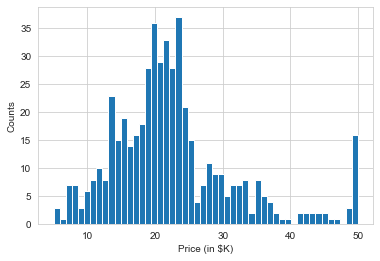

In [11]:
plt.hist(boston.target,bins=50)
plt.xlabel('Price (in $K)')
plt.ylabel('Counts')

Text(0, 0.5, 'Price in $K')

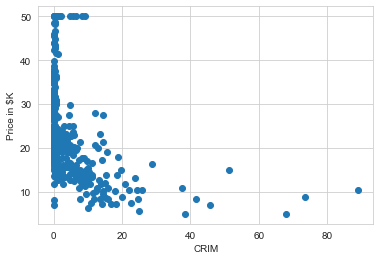

In [15]:
plt.scatter(boston.data[:,0],boston.target)
plt.xlabel('CRIM')
plt.ylabel('Price in $K')

Text(0, 0.5, 'Price in $K')

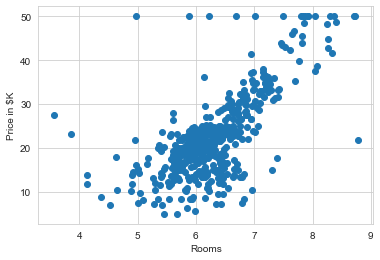

In [20]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Rooms')
plt.ylabel('Price in $K')

In [21]:
type(boston.data)

numpy.ndarray

In [22]:
boston_df = DataFrame(boston.data)


In [25]:
boston_df.columns = boston.feature_names

In [27]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
boston_df['Price'] = boston.target

In [29]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


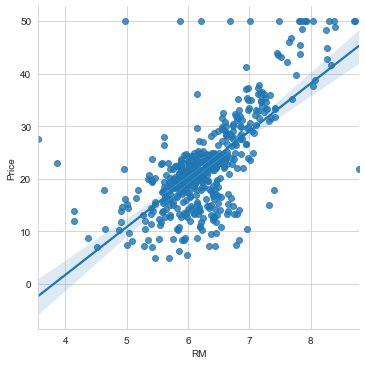

In [30]:
sns.lmplot('RM','Price',data=boston_df)

In [35]:
X = boston_df.RM
X = np.vstack([X,np.ones(len(X))]).T

In [37]:
Y = boston_df.Price

In [40]:
m,b = np.linalg.lstsq(X,Y)[0]

<ipython-input-40-ef940c5aa2a6>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,b = np.linalg.lstsq(X,Y)[0]


In [41]:
m

9.102108981180315

In [42]:
b

-34.67062077643857

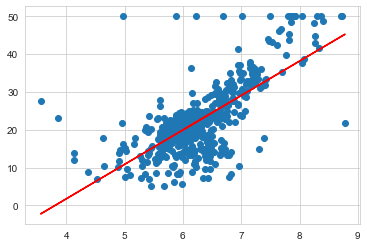

In [45]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,m*x+b,'r')

In [46]:
result = np.linalg.lstsq(X,Y)

<ipython-input-46-135b1c56a2aa>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [47]:
result

(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [48]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [49]:
rmse

array([6.60307139])

In [50]:
X.shape

(506, 2)

In [51]:
import sklearn

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lreg = LinearRegression()

In [54]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

In [59]:
lreg.fit(X_multi,Y_target)

LinearRegression()

In [60]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [61]:
lreg.intercept_

36.45948838509015